# Overview
This notebook is intended to walk you through the process of lineament extraction from 3DEP Elevation data (DEMs).



# Context

This workflow is designed for identifying lineaments in topography underlain by karst substrates. 

# Generalized Workflow

## ESRI ArcGIS Pro 3.2 Workflow

**1. Prepare the DEM**
>1.1 Ensure the DEM is properly loaded and has a suitable projection

**2. Pre-process the DEM**
>2.1 Apply a smoothing filter to reduce noise
>* Use the **Focal Statistics** tool with a low-pass filter (mean or median)
This step helps mnimize small-scale variations while preserving larger linear features

**3. Generate Hillshade and Slope Maps**
>3.1 Create hillshade maps from multiple sun angles to enhance the visibility of linear features.
>* Use the **Hillshade** tool with different azimuths (eg. 0,45,90,135)

3.2 Create a slope map to highlight areas of steep gradients.
>* Use the **Slope** tool

**4. Apply Edge Detection**
>4.1 Use edge detection techniques to highlight linear features.
>* Use the **Spatial Analyst** extention with the **Edge Detection** tool or apply a Sobel filter

**5. Extract Lineaments**
>5.1 Use the **Line Density** tool or the **Contours** tool to generate contours at a fine interval.
>5.2 Use the **Raster to Polyline** tool to convert the exracted features into vector lines.

**6. Visual Interpretation**
>6.1 Overlay the extracted lines on the hillshade and slope maps
>6.2 Manually inspect and digitize lineamens that align with geological structures.
>6.3 Use **Editing** tools to refine and adjust the extracted lineaments.

**7. Automated Lineament Extraction**
>7.1 Use the **Lineament Extraction** tool in the Arc Hydro Tools or third-party plugins if available
>7.2 This step automates the process of identifying linear features but my require post-processing for accuracy.

**8. Post-Processing**
>8.1 Clean up the extracted lineaments by removing spurious lines and combining segments that belong to the same features.
>8.2 Use the **Merge** and **Simplyify Line** tools to refine the lineaments.

**9. Analysis and Validation**
>9.1 Validate the identified lineaments with field data or high-resolution imagery if available
>9.2 perform a spatial analysis such as density analsis or directional analysis, to understand the distribution and orientation of lineaments

## Python Workflow
1. Set Up Environment
2. Load DEM
3. Smooth the DEM
4. Generate Hillshade and Slope Maps
5. Apply Edge Detection
6. Extract Lineaments
7. Post-Processing



# To Do List
1. find a validated lineament dataset and accompanying DEM 1m resolution
2. Demonstrate the workflow in ArcGIS
3. Repoduce the workflow in This Notebook


**1. Prepare the DEM**
>1.1 Ensure the DEM is properly loaded and has a suitable projection
Data Paramters:

DEM 1x1m resolution
Cell size x: 1.0000000001043723
Cell size y: 1.0000000001043718
Format - FGDBR
Pixel Type - floating point
Pixel Depth - 32 bit
Projected Coordinate System - NAD 1983 (2011) UTM Zone 12N
Linear Unit - Meters (1.0)
Authority - EPSG





**2. Pre-process the DEM**
>2.1 Apply a smoothing filter to reduce noise
>* Use the **Focal Statistics** tool with a low-pass filter (mean or median)
This step helps mnimize small-scale variations while preserving larger linear features

**Focal Statistics**
Input Raster - MRK1m_DEM_Clip

Parameter Choices and Justification
* Neighborhood: Circle vs Rectangle
>* circular neighborhoods often perform better with lineament analysis beacuse its isotropic, meaning its treats all directions equally. this is beneficial when looking for linear features that may not align with the grid orientation of the raster data.
>* circular neighborhoods are particularly effective in minimizing diretional bias making them suitable for detecting natural features like faults and fractures which can occur in any direction.


>* Radius: 
A common radius used is 3 to 5 cells (3-5 meters for a 1-meter DEM). This range balances capturing enough surrounding data to smooth the surface while preserving significant geological features.

>* Unit type:
Using map units (meters) is preferred for better control and understanding of the spatial extent.

* Statistics Type: Mean vs Median Smoothing
>* mean smoothing is effective for reducing random noise and smoothing the data uniformly, it calculates the average value within the neighborhood, which can help in enhancing the visibility of large, continious linear features. However, mean smoothing can be influenced by outliers, which might blur significant edges that correspond to faults.
>* median smoothing is less sensitive to outliers compared to mean smoothing. it is particularly useful in preserving edges and abrupt hanges, which are critical for accuratly delineating lineaments. This method can better maintain the sharpnes of linear features, making it more effective for fault detection where maintaing edge definition is important.

**Sources and Further Reading**
A review of remote sensing techniques for geological lineament analysis suggests that circular neighborhoods and median filtering are generally preferred for detecting faults due to their ability to minimize directional bias and preserve edge sharpness (Ahmadi et al., 2021).

A case study on lineament extraction from DEMs in South Ecuador confirms the utility of circular neighborhoods and median smoothing in enhancing the detection of geological features (Echeverria et al., 2022).

3. Generate Hillshade and Slope Maps

3.1 **Hillshade** tool
* Create 4 hillshades using the hillshade tool

3.2 **Surface Parameters** tool
input surface raster: Smoothed_DEM
output raster: Slope_MRK1m
Paramter type: Slope
Local surface type: Biquadratic
> Justification
**Quadratic Local Surface**
Description: Fits a second-degree polynomial (quadratic) surface to the neighborhood cells.
Advantages: Suitable for more complex terrain where a simple plane doesn’t adequately represent surface variations. It captures curvature and more nuanced changes in terrain.
Use Case: Use for terrain with moderate complexity, capturing more detailed variations without excessive computation.
>
**Biquadratic Local Surface:**
Description: Fits a higher-order polynomial surface (biquadratic) to the neighborhood cells.
Advantages: More accurate for highly complex terrains, capturing even finer details and variations in the surface.
Use Case: Use for highly complex terrain where capturing minute details is crucial, but be aware it’s more computationally intensive.

Neighborhood Distance: 5 meters
Z Unit: Meter
Slope measurment: Degree
**Sources and Further Reading**

### Python Workflow


####  1. Setup Environment

In [2]:
#!pip install pyparsing
#!pip install rasterio

                                              0.0/24.3 MB ? eta -:--:--
                                             0.0/24.3 MB 660.6 kB/s eta 0:00:37
                                              0.3/24.3 MB 3.2 MB/s eta 0:00:08
     -                                        0.8/24.3 MB 6.6 MB/s eta 0:00:04
     --                                       1.5/24.3 MB 8.6 MB/s eta 0:00:03
     ---                                      2.3/24.3 MB 10.6 MB/s eta 0:00:03
     -----                                    3.3/24.3 MB 12.2 MB/s eta 0:00:02
     -------                                  4.4/24.3 MB 14.0 MB/s eta 0:00:02
     ---------                                5.7/24.3 MB 15.9 MB/s eta 0:00:02
     ------------                             7.3/24.3 MB 18.0 MB/s eta 0:00:01
     ---------------                          9.3/24.3 MB 20.4 MB/s eta 0:00:01
     ------------------                      11.4/24.3 MB 28.5 MB/s eta 0:00:01
     ----------------------                  14.2/2

In [7]:
# import required libraries
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
from rasterio.warp import calculate_default_transform, reproject, Resampling
from matplotlib.colors import LightSource
import numpy as np


####  2. Load and display the DEM

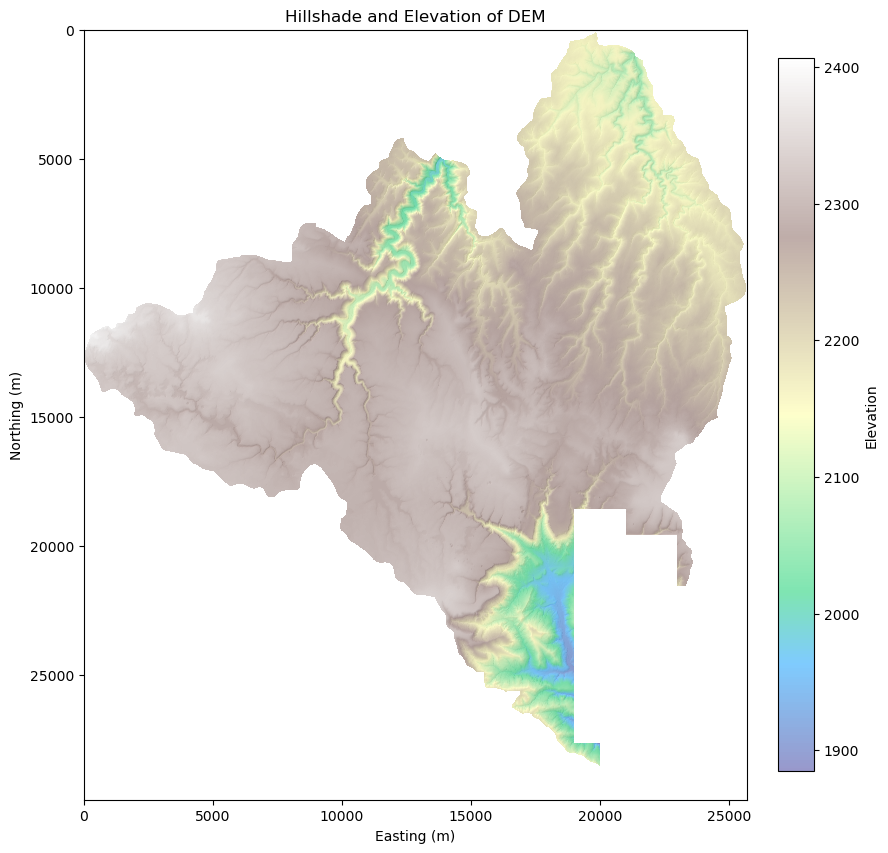

In [9]:

# Define the path to the exported raster
raster_path = "C:/Users/rl587/Documents/GitHub/ATUR_Python_Geoprocessing/Sample_input_data/Sample_DEM_raw.tif"

# Reproject the raster to NAD 1983 (2011) UTM Zone 12N if necessary
with rasterio.open(raster_path) as src:
    if src.crs.to_string() != 'EPSG:6341':
        transform, width, height = calculate_default_transform(
            src.crs, 'EPSG:6341', src.width, src.height, *src.bounds)
        kwargs = src.meta.copy()
        kwargs.update({
            'crs': 'EPSG:6341',
            'transform': transform,
            'width': width,
            'height': height
        })

        with rasterio.open('reprojected_raster.tif', 'w', **kwargs) as dst:
            for i in range(1, src.count + 1):
                reproject(
                    source=rasterio.band(src, i),
                    destination=rasterio.band(dst, i),
                    src_transform=src.transform,
                    src_crs=src.crs,
                    dst_transform=transform,
                    dst_crs='EPSG:6341',
                    resampling=Resampling.nearest)
        raster_path = 'reprojected_raster.tif'

# Load the reprojected raster
with rasterio.open(raster_path) as src:
    dem = src.read(1)

# Mask the no-data values (assumed to be 0)
dem = np.ma.masked_equal(dem, 0)

# Hillshade calculation
ls = LightSource(azdeg=315, altdeg=45)
hillshade = ls.hillshade(dem, vert_exag=1, dx=1, dy=1)

# Plot the hillshade and elevation
fig, ax = plt.subplots(figsize=(10, 10))

# Display the hillshade
hillshade_plot = ax.imshow(hillshade, cmap='gray', alpha=0.5)

# Display the DEM with an elevation color ramp
elevation_plot = ax.imshow(dem, cmap='terrain', alpha=0.5)

# Add colorbar for the elevation
cbar = plt.colorbar(elevation_plot, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Elevation')

plt.title('Hillshade and Elevation of DEM')
plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)')
plt.show()

####  3. Smooth DEM

In [ ]:
smoothed_dem = FocalStatistics(dem, NbrCircle(5, "CELL"), "MEAN")
smoothed_dem.save("smoothed_dem.tif")